## Sahil Bavishi
### 200968174

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### Q1)Write down the meta information about the “cancer.csv” data set available in the UCI repository

* Dataset Characteristics   = Multivariate
* Number of instances       = 569
* Attribute Characteristics = Real
* Number of Attributes      = 32
* Associated Task           = Classification
* Missing Values            = No

**Attribute Information:**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [2]:
df = pd.read_csv('cancer (1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
for i in range(len(df.columns)):
    print(f'Unique values in column {df.columns[i]}:', df[df.columns[i]].nunique())

Unique values in column id: 569
Unique values in column diagnosis: 2
Unique values in column radius_mean: 456
Unique values in column texture_mean: 479
Unique values in column perimeter_mean: 522
Unique values in column area_mean: 539
Unique values in column smoothness_mean: 474
Unique values in column compactness_mean: 537
Unique values in column concavity_mean: 537
Unique values in column concave points_mean: 542
Unique values in column symmetry_mean: 432
Unique values in column fractal_dimension_mean: 499
Unique values in column radius_se: 540
Unique values in column texture_se: 519
Unique values in column perimeter_se: 533
Unique values in column area_se: 528
Unique values in column smoothness_se: 547
Unique values in column compactness_se: 541
Unique values in column concavity_se: 533
Unique values in column concave points_se: 507
Unique values in column symmetry_se: 498
Unique values in column fractal_dimension_se: 545
Unique values in column radius_worst: 457
Unique values in co

In [4]:
values = ['id', 'Unnamed: 32']
df.drop(values, axis=1, inplace=True)

In [5]:
diag_map = {'M': 0, 'B': 1}

df['diagnosis'] = df['diagnosis'].map(diag_map)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Q2)Tabulate and visualize the distribution of the numeric variables.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

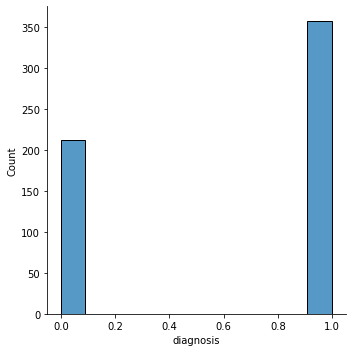

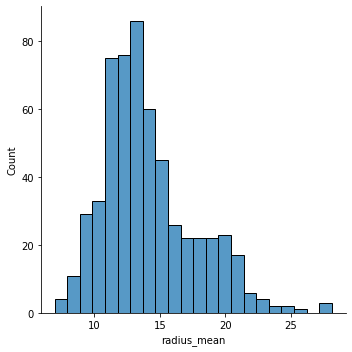

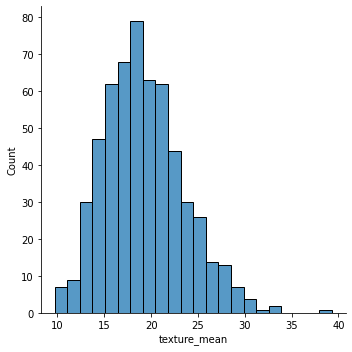

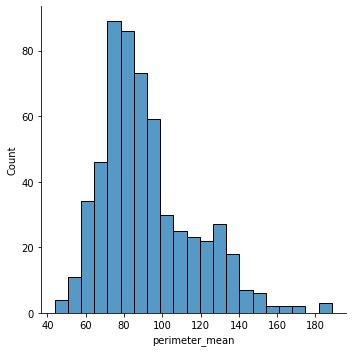

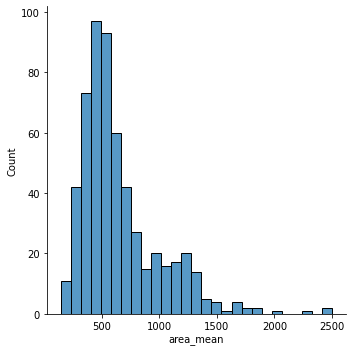

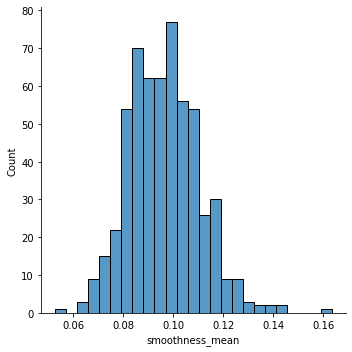

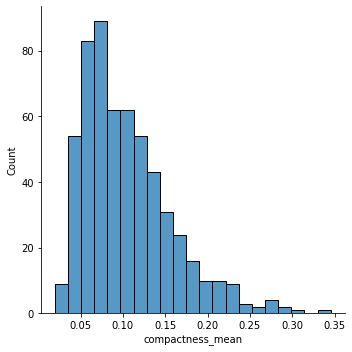

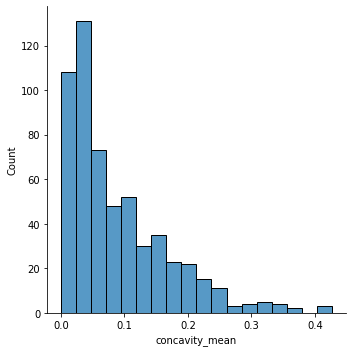

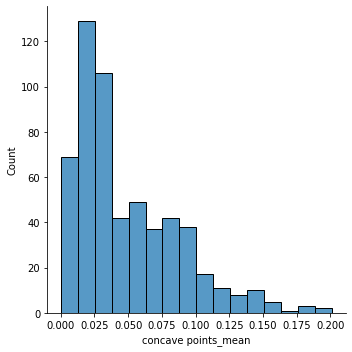

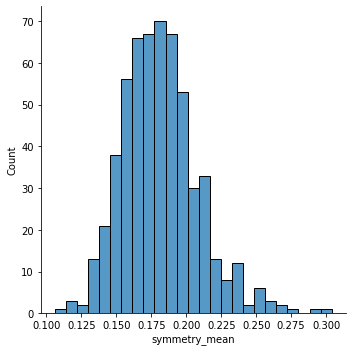

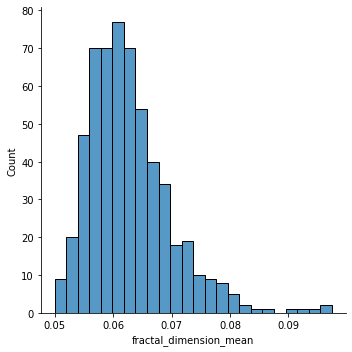

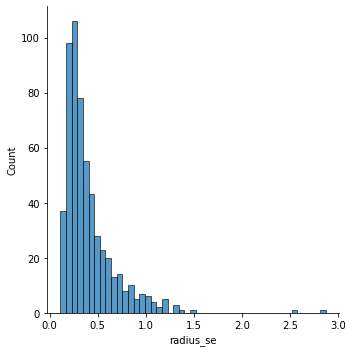

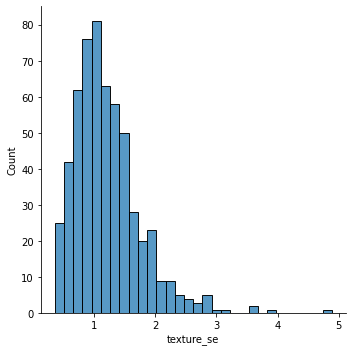

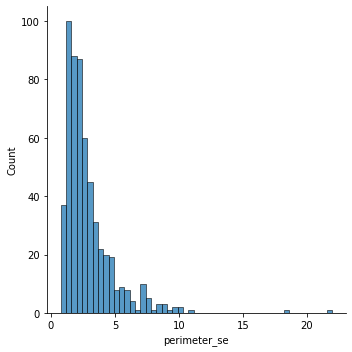

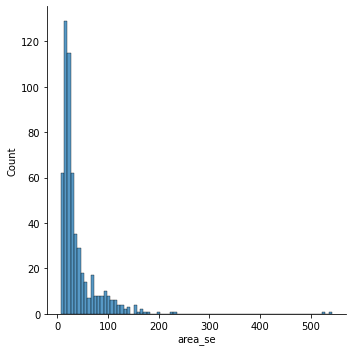

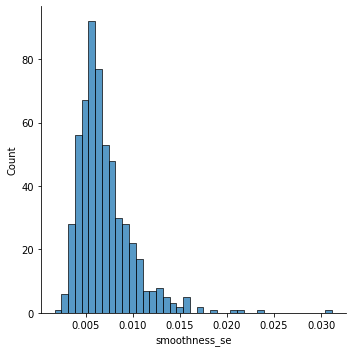

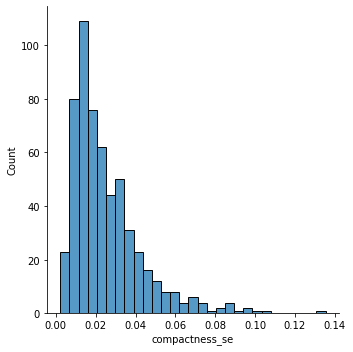

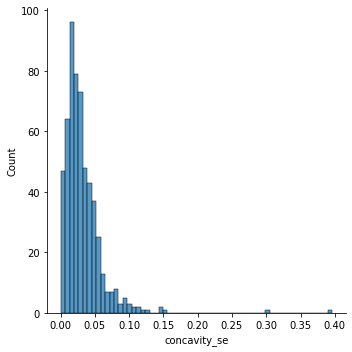

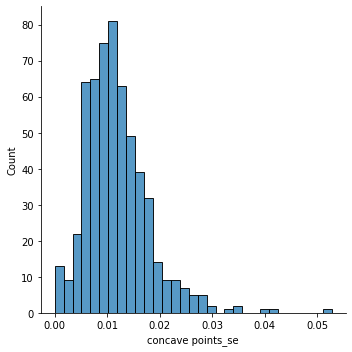

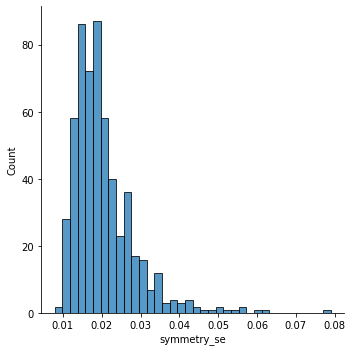

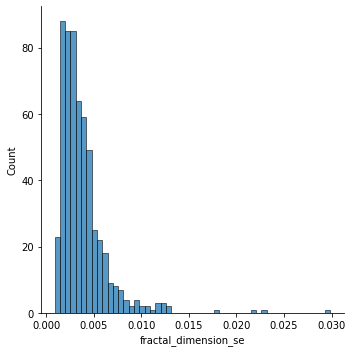

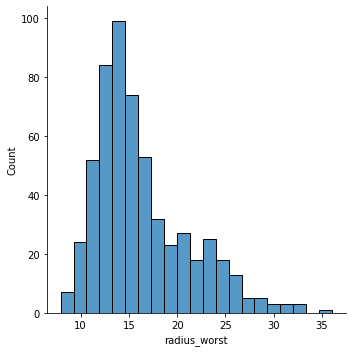

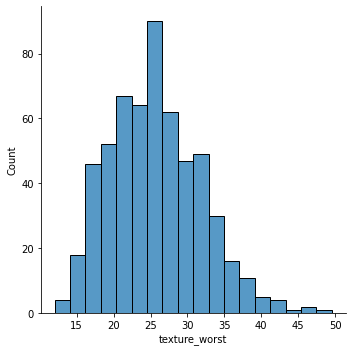

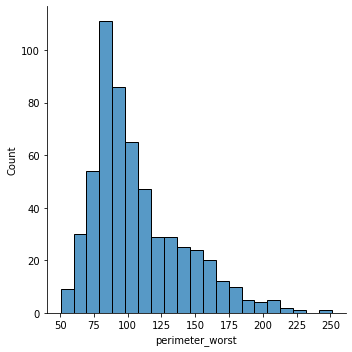

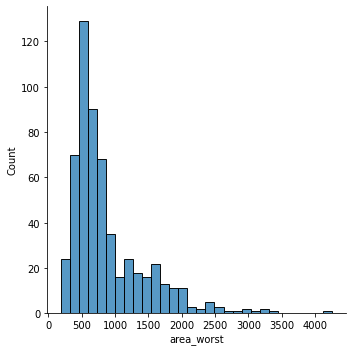

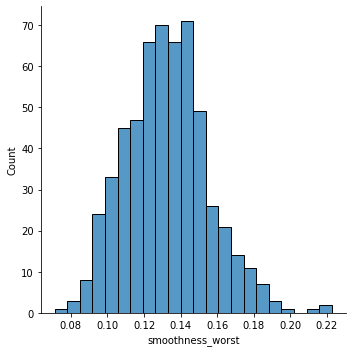

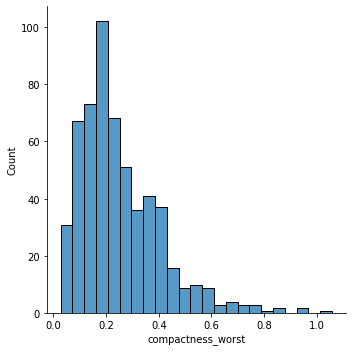

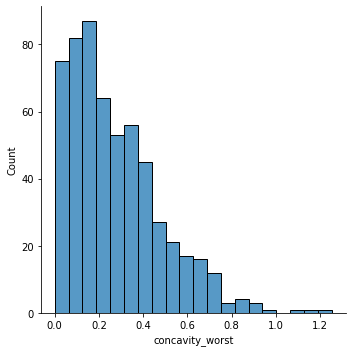

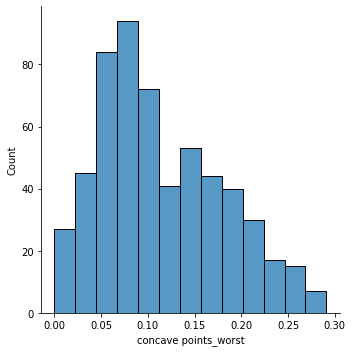

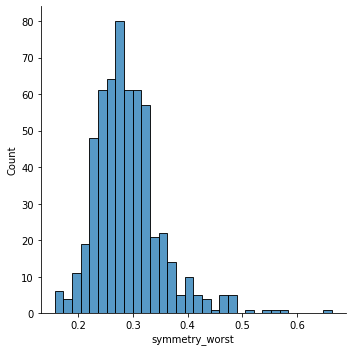

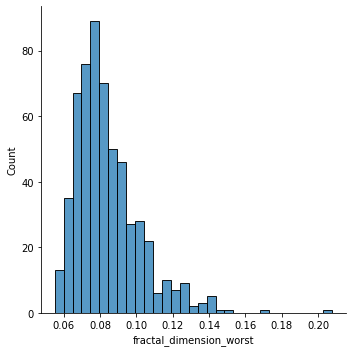

In [6]:
for col in list(df):
    sns.displot(df, x=str(col))

### Q3)Perform the required preprocessing , 70,30 split and build a classifier using the SVM model available in SciKit Learn.

In [7]:
X, y = df.drop(['diagnosis'], axis=1).to_numpy(), df[['diagnosis']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(398, 30) (398, 1) (171, 30) (171, 1)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(np.asarray(X_train))
X_test = scaler.transform(np.asarray(X_test))

### Q4)Tune the hyperparameters of kernel (linear, polynomial, and radial basis), regularization and gamma. Tabulate the model performance and comment on the best model found for the given dataset

In [9]:
depth_range = np.linspace(1, 10, num=10)
svc = SVC(random_state=42)
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':depth_range, 'gamma': ('scale', 'auto')}
clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train.ravel())

GridSearchCV(cv=10, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='roc_auc')

In [10]:
results = pd.DataFrame(clf.cv_results_)
results.sort_values(['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
23,0.006336,0.000392,0.002713,0.000331,4.0,auto,rbf,"{'C': 4.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.996000,0.008198,1
20,0.006761,0.000962,0.003342,0.002101,4.0,scale,rbf,"{'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.996000,0.008198,1
29,0.006237,0.000324,0.003139,0.001728,5.0,auto,rbf,"{'C': 5.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.995733,0.008860,3
14,0.007533,0.003077,0.002572,0.000073,3.0,scale,rbf,"{'C': 3.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.995733,0.008860,3
26,0.006396,0.000290,0.002506,0.000062,5.0,scale,rbf,"{'C': 5.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.995733,0.008860,3
17,0.006247,0.000257,0.002635,0.000153,3.0,auto,rbf,"{'C': 3.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,1.000000,0.995733,0.008860,3
11,0.014672,0.005404,0.005485,0.003558,2.0,auto,rbf,"{'C': 2.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,0.997222,0.995722,0.008104,7
8,0.010115,0.004117,0.006039,0.005722,2.0,scale,rbf,"{'C': 2.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,0.997222,0.995722,0.008104,7
41,0.007039,0.002548,0.002590,0.000166,7.0,auto,rbf,"{'C': 7.0, 'gamma': 'auto', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,0.997222,0.995456,0.008765,9
38,0.006457,0.001126,0.002489,0.000062,7.0,scale,rbf,"{'C': 7.0, 'gamma': 'scale', 'kernel': 'rbf'}",1.000000,1.0,...,1.000000,1.000000,1.0,1.0,0.984000,1.000000,0.997222,0.995456,0.008765,9


In [11]:
print("The best estimator across ALL searched params:\n", clf.best_estimator_)
print("The best score across ALL searched params:\n", clf.best_score_)
print("The best parameters across ALL searched params:\n", clf.best_params_)

The best estimator across ALL searched params:
 SVC(C=4.0, random_state=42)
The best score across ALL searched params:
 0.9960000000000001
The best parameters across ALL searched params:
 {'C': 4.0, 'gamma': 'scale', 'kernel': 'rbf'}


In [12]:
svc.set_params(**clf.best_params_)

SVC(C=4.0, random_state=42)

In [13]:
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=4.0, random_state=42)

In [14]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [15]:
accuracy_score(y_test, y_pred)

0.9766081871345029

# Conclusion

* The best kernel is rbf (radial basis)
* The best gamma is scale
* The best regularization value C is 4.0
* The accuracy score using the above hyperparameters ~ 98%